In [27]:
import pandas as pd 
import nfl_data_py as nfl
import matplotlib.pyplot as plt 
from matplotlib import style 



In [28]:
year = 2020

In [29]:
df = nfl.import_ngs_data(stat_type='receiving')

In [30]:
df

,season,season_type,week,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,...,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,Tyreek Hill,WR,KC,7.822639,3.518714,7.870602,16.708058,...,599.0,6,4.670656,5.331570,-0.660915,00-0033040,Tyreek,Hill,10,T.Hill
1,2016,REG,0,Richard Rodgers,TE,GB,7.605789,2.693882,8.381277,6.884246,...,271.0,2,3.347667,3.274428,0.073239,00-0031384,Richard,Rodgers,82,None
2,2016,REG,0,Travis Benjamin,WR,LAC,7.601111,3.017426,13.329867,19.536131,...,677.0,4,5.679362,4.968711,0.710651,00-0029269,Travis,Benjamin,12,None
3,2016,REG,0,Cordarrelle Patterson,WR,MIN,7.466269,3.230445,5.564000,9.530008,...,453.0,2,6.278462,5.619060,0.659402,00-0030578,Cordarrelle,Patterson,84,C.Patterson
4,2016,REG,0,DeSean Jackson,WR,WAS,7.295833,2.886285,16.035400,28.085914,...,1005.0,4,4.867143,5.051773,-0.184630,00-0026189,DeSean,Jackson,11,D.Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,2022,POST,23,Travis Kelce,TE,KC,8.130000,4.758672,9.373333,38.038553,...,81.0,1,4.126667,5.998231,-1.871564,00-0030506,Travis,Kelce,87,T.Kelce
10414,2022,POST,23,Dallas Goedert,TE,PHI,7.188333,2.019201,7.165714,15.203225,...,60.0,0,2.105000,2.905969,-0.800969,00-0034351,Dallas,Goedert,88,D.Goedert
10415,2022,POST,23,JuJu Smith-Schuster,WR,KC,6.505714,3.367508,6.127778,37.301319,...,53.0,0,2.688571,4.654107,-1.965536,00-0033857,John,Smith-Schuster,9,J.Smith-Schuster
10416,2022,POST,23,DeVonta Smith,WR,PHI,4.393750,3.577102,12.021111,32.791804,...,100.0,0,6.317143,6.742514,-0.425371,00-0036912,DeVonta,Smith,6,D.Smith


In [31]:
df = df[df['week'] == 0]
df = df[df['season'] == year]
df = df.reset_index()

In [32]:
average_yac = df['avg_yac'].mean()
average_yacoe = df['avg_yac_above_expectation'].mean()

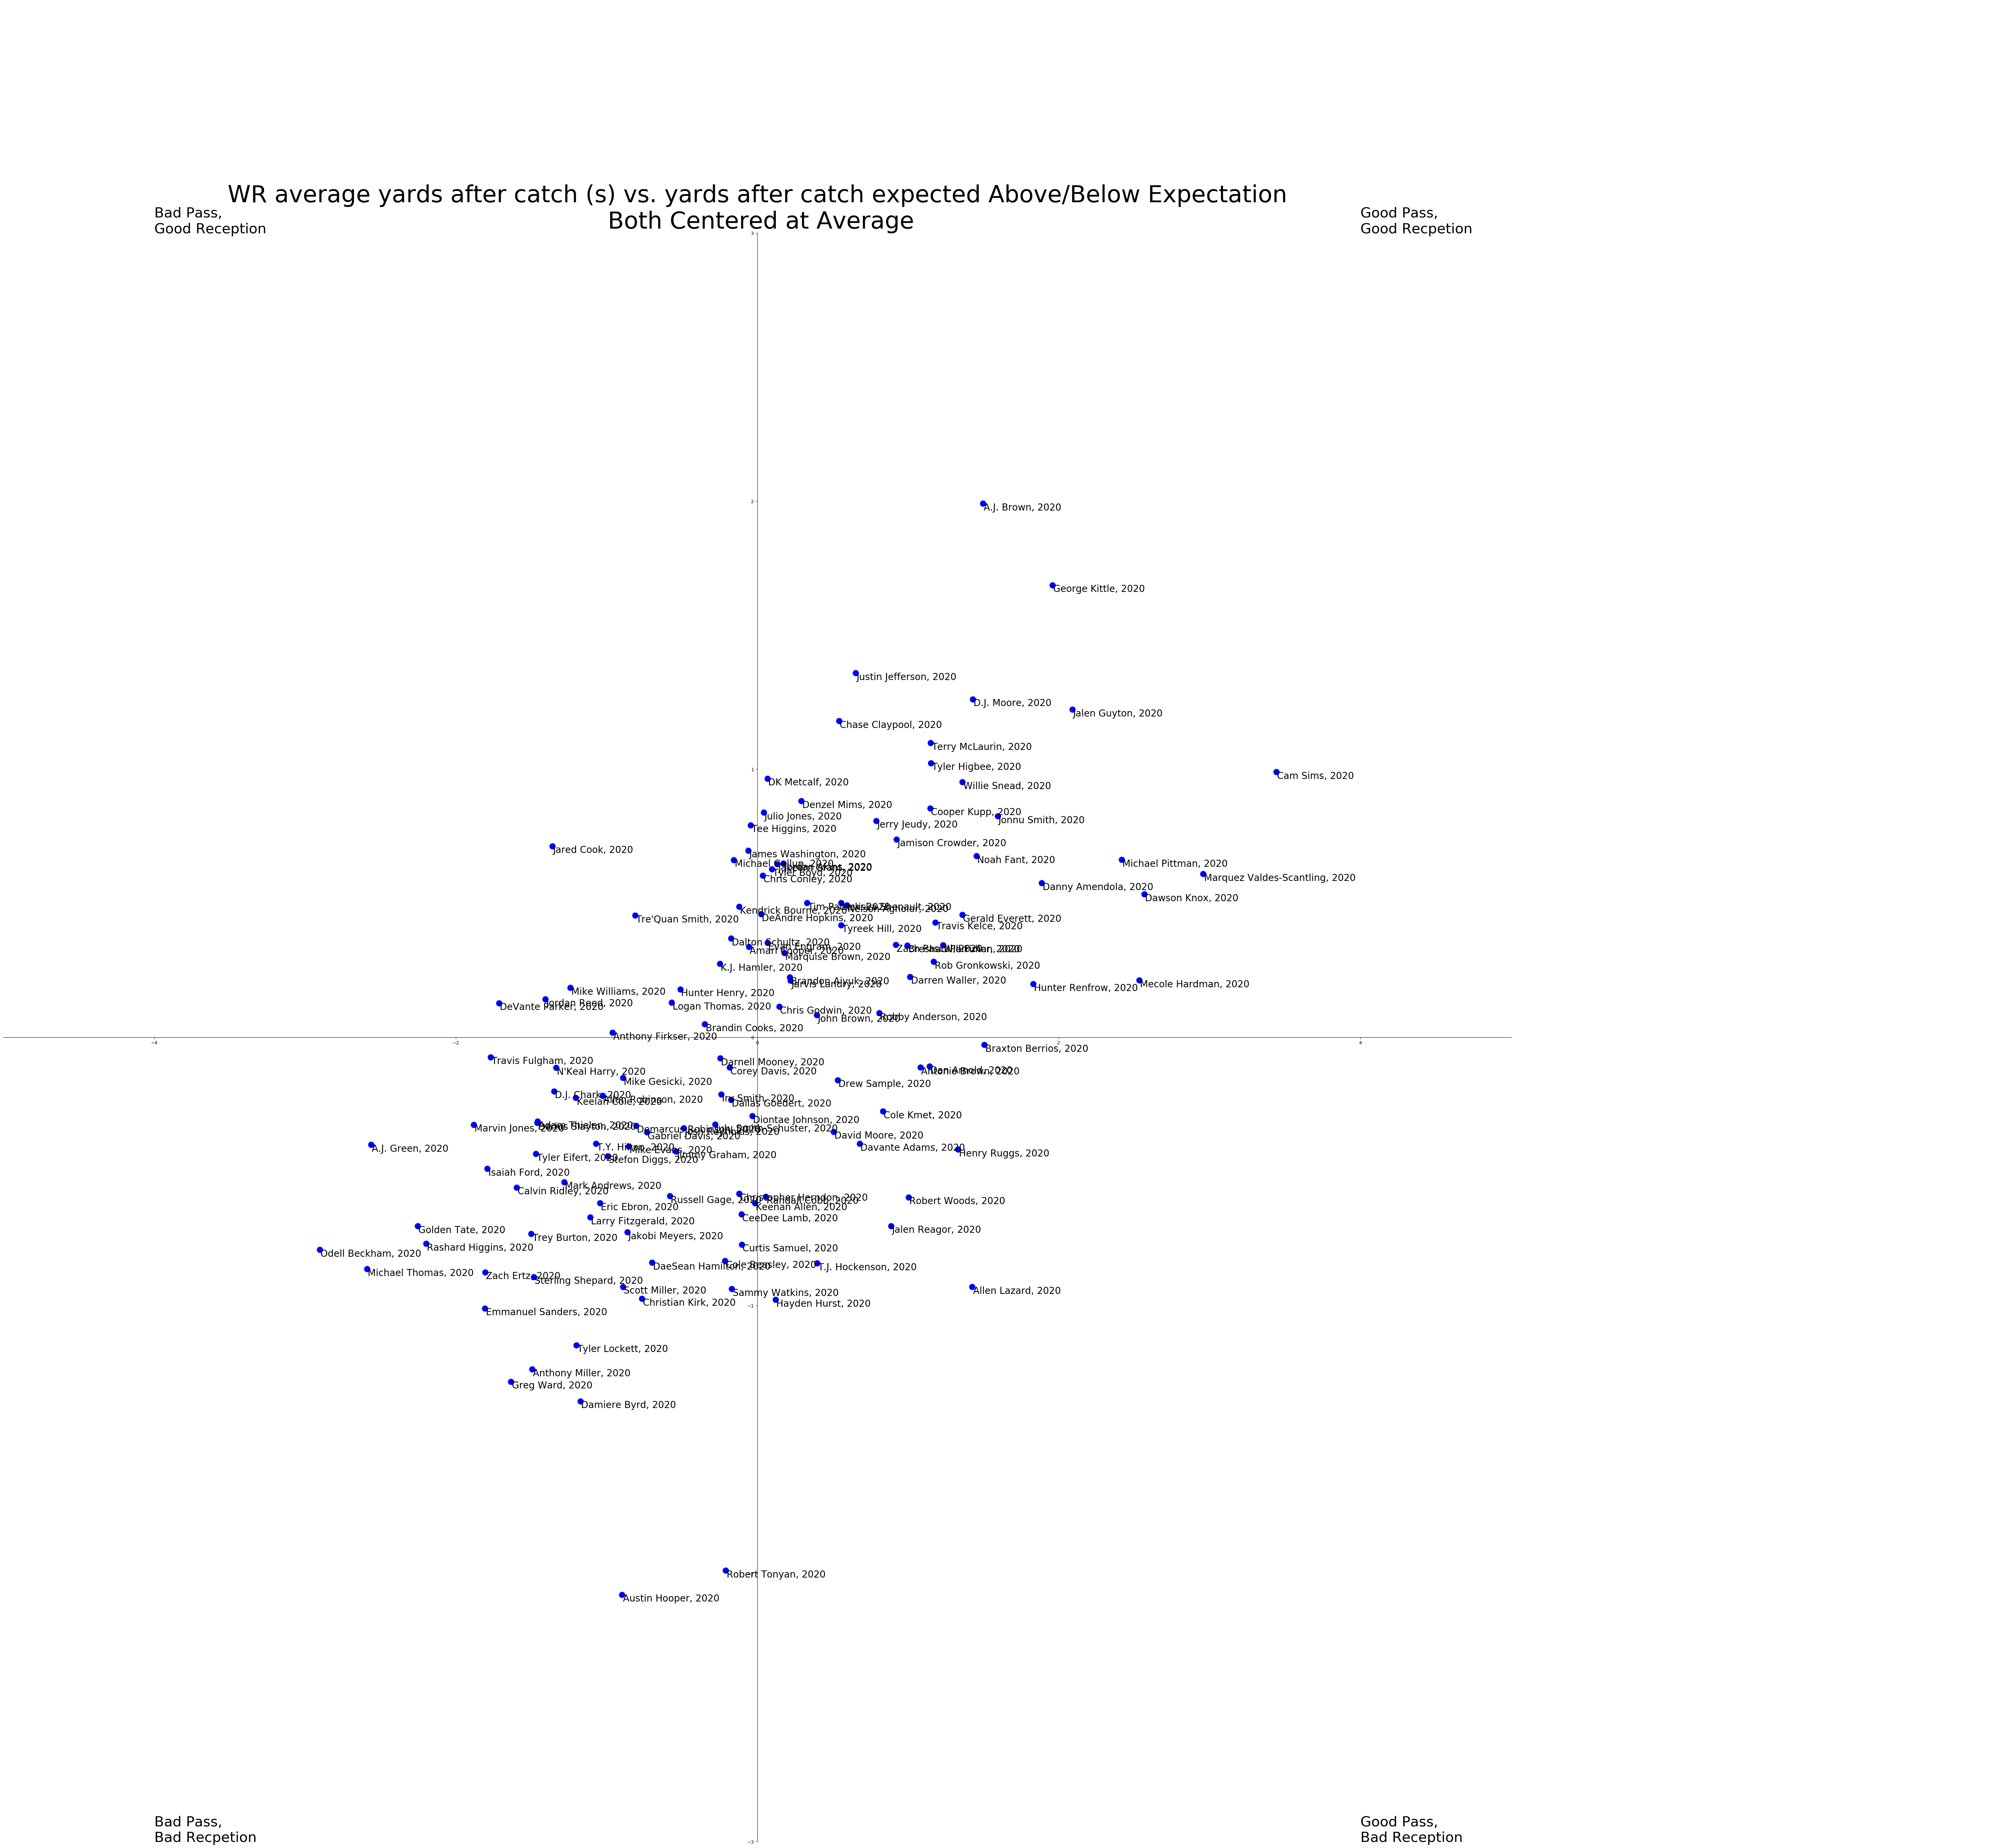

In [45]:
# Visualize the data\

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [60, 54]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x = []
y = []

# Define the x and y variables
for WR in df.index:
    x.append(df['avg_yac'][WR] - average_yac)
    y.append(df['avg_yac_above_expectation'][WR] - average_yacoe)
    
# Put x,y into dictionary
xy = pd.DataFrame({'x' : x, 'y' : y})

# Define the plot
fig, ax = plt.subplots()


ax.scatter(xy['x'], xy['y'], s=150, c='blue')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.autoscale(enable=True) 

# Set x and y axis limits
plt.xlim((-5,5))
plt.ylim((-3,3))



for nameyear in xy.index:
    plt.annotate(f"{df['player_display_name'][nameyear]}, {df['season'][nameyear]}",\
                 (xy['x'][nameyear] + 0.005,
                  xy['y'][nameyear] - 0.025),
                  fontsize=20)

# Annotate Quadrants
plt.annotate('Good Pass,\nGood Recpetion', (4,3), fontsize=30)
plt.annotate('Bad Pass,\nGood Reception', (-4,3), fontsize=30)
plt.annotate('Bad Pass,\nBad Recpetion', (-4,-3), fontsize=30)
plt.annotate('Good Pass,\nBad Reception', (4,-3), fontsize=30)
    

# Add a title
plt.title(f'WR average yards after catch (s) vs. yards after catch expected Above/Below Expectation\n Both Centered at Average',
         fontdict={'fontsize': 50})



# Style the chart
plt.show()